In [1]:
%matplotlib notebook
import os
import pandas as pd 
import math
import numpy as np 
import matplotlib.pyplot as plt
import random as r 
import glob

In [2]:
nBodies = 3

# get sim files
workDir = "/Users/brandonmanley/Documents/nBody/data/pred/"

# Import data
file = workDir + "/batch_brutus10_4.csv"
df = pd.read_csv(fname, index_col=False)


In [3]:
# grab predicted dataframe
#############################################

cols = ["fileNum", "eventID"]
massHead, xHead, yHead, dxHead, dyHead, xfHead,yfHead, dxfHead, dyfHead = [], [], [], [], [], [], [], [], []
for i in range(1, nBodies+1):
    massHead.append("m{0}".format(i))
    xHead.append("x{0}".format(i))
    yHead.append("y{0}".format(i))
    dxHead.append("dx{0}".format(i))
    dyHead.append("dy{0}".format(i))
    xfHead.append("x{0}tEnd".format(i))
    yfHead.append("y{0}tEnd".format(i))
    dxfHead.append("dx{0}tEnd".format(i))
    dyfHead.append("dy{0}tEnd".format(i))
cols += massHead + xHead + yHead + dxHead + dyHead + ["tEnd"] + xfHead + yfHead + dxfHead + dyfHead
    
prediction = False # whether read nn file or nots
nnfile = "/nBodyData/pred/predicted_paths_batch_3_1.csv"

pdf = df
if prediction:
    pdf = pd.read_csv(nnfile)

In [5]:
pdf.head()
with pd.option_context('mode.use_inf_as_null', True):
   pdf = pdf.dropna()

In [6]:
# combine dataframes
###############################################
pdf.eventID = pdf.eventID.astype(int)
pdf.sort_values(["eventID"], axis=0, ascending=True, inplace= True) 

mdf = pdf
if prediction:
    adf = pd.merge(left=sdf,right=pdf, on='eventID')
    mdf = adf.drop_duplicates(subset='eventID')

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

<IPython.core.display.Javascript object>


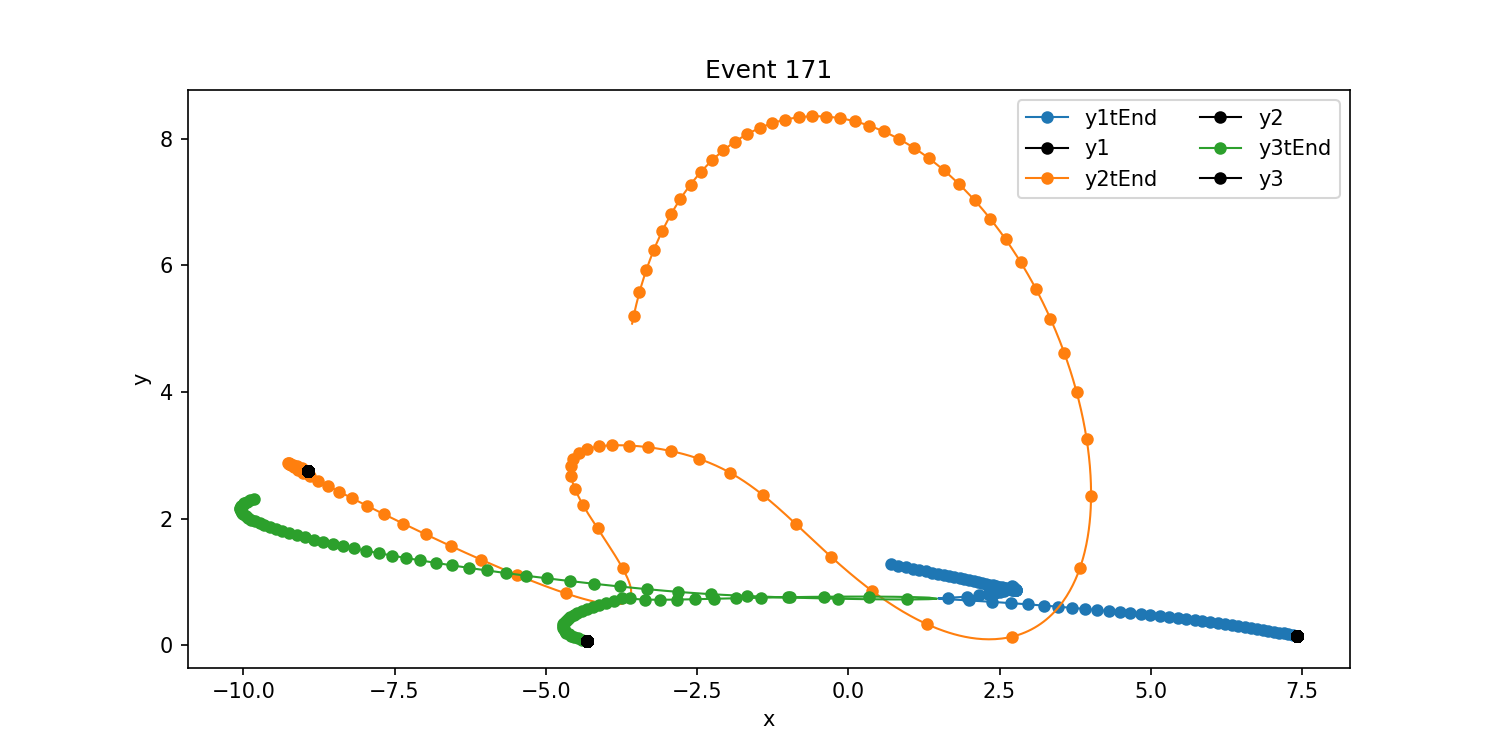

/home/llavezzo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
/home/llavezzo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
/home/llavezzo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Second argument 'y3' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.


In [13]:
# plot an individual event
###############################################

# pick event to plot
r.seed(1)
indexArray = np.array(mdf['eventID'])
indexArray = np.unique((indexArray/10000).astype(int))
indexInt = np.random.choice(indexArray)
index = indexInt*10000
print(indexArray)

# plot event 
edf = mdf.loc[(mdf['eventID'] >= index) & (mdf['eventID'] <= (index+2560))]
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (10,5)

tsize = 5
for i in range(1, nBodies+1):
    ax.plot('x{0}tEnd'.format(i), 'y{0}tEnd'.format(i), data=edf, marker='o',linewidth=1, markersize=tsize, markevery=30)
    ax.plot('x{0}'.format(i), 'y{0}'.format(i), data=edf, marker='o',color='black', linewidth=1, markersize=tsize, markevery=30)

if prediction:
    ax.plot('xfp{0}'.format(i), 'yfp{0}'.format(i), data=edf, marker='x', linestyle=':', linewidth=1, markersize=tsize, markevery=30)

plt.legend(loc='best', ncol=2, fancybox=True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Event {0}'.format(int(index/10000)))
plt.show()